In [1]:
# using Plots
using FastGaussQuadrature
using LinearAlgebra
using DifferentialEquations
using NLsolve
using Printf
using SparseArrays
# using ModelingToolkit
using BenchmarkTools
using Statistics
using CairoMakie
using LinearAlgebra
using LaTeXStrings
using ForwardDiff
using Optim
using Polynomials
using Noise
using Random
using NumericalIntegration

In [2]:
#################################################################
#  Set of 4 Figure Themes for Makie/CairoMakie                  #
#################################################################

#################################################################
#  Defaults for linear axes x,y plots                           #
#################################################################

theme_linear = Theme(    
    
    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),
    
    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = identity,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(5),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = identity,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(5),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = false,
        xminorgridvisible  = false,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = false,
        yminorgridvisible  = false,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for log-log axes x,y plots                          #
#################################################################

theme_log = Theme(    

    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = log10,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(9),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = log10,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(9),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for log x/linear y plots                            #
#################################################################

theme_logx = Theme(    
    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = log10,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(9),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = identity,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(5),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for linear x/log y plots                            #
#################################################################

theme_logy = Theme(    

    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = identity,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(5),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = log10,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(9),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)
;

In [3]:
CairoMakie.activate!(type = "svg")

Will consider a simple reaction:

\begin{align}
    A + * &\longleftrightarrow A_*\\
    A_*   &\longrightarrow B + *\\
\end{align}
    
However, for this simulation, we'll consider an isotope switch so that we can distinguish between different types of A and B:

\begin{align}
    {}^{1}A + * &\longleftrightarrow {}^{1}A_*\\
    {}^{2}A + * &\longleftrightarrow {}^{2}A_*\\
    {}^{1}A_*   &\longrightarrow {}^{1}B + *\\
    {}^{2}A_*   &\longrightarrow {}^{2}B + *\\
\end{align}

Each above is an elementary step.

We will treat this as a differential PBR, which can be simulated as a CSTR since composition doesn't change from inlet to exit.

**Overall Reaction**

\begin{align}
    A + * &\longleftrightarrow A_*\\
    A_*   &\longrightarrow B + *\\
\end{align}
    
**Mechanism with Isotopic Labels**

\begin{align}
    {}^{1}A + * &\longleftrightarrow {}^{1}A_*\\
    {}^{2}A + * &\longleftrightarrow {}^{2}A_*\\
    {}^{1}A_*   &\longrightarrow {}^{1}B + *\\
    {}^{2}A_*   &\longrightarrow {}^{2}B + *\\
\end{align}

    
Each above is an elementary step.

We will treat this as a differential PBR, which can be simulated as a CSTR since composition doesn't change from inlet to exit.

In [4]:


# function transientmodel(du, u, p, t)
#     FA1f, FA2f, FB1f, FB2f, FArf = p #Switching gases
#     FA1, FA2, FB1, FB2, FAr, thetaA1, thetaA2, = u 
#     ...
#     r11     = k1f*aA1*theta - k1r*thetaA1
#     ...
#     RA1     = -r11
    
#     du[1]     = 1/tau*(FA1f - FA1 + RA1*NS)
#     ...
#     du[7]     = r12 - r22
# end

# function condition1(u, t, integrator)
#     return t == 10.0
# end

# function affect1!(integrator)
#     integrator.p = [0.0, 100.0, 0.0, 0.0, 0.0]
# end

# cb1  = DiscreteCallback(condition1, affect1!)

# var0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
# p0   = [99.99, 0.0, 0.0, 0.0, 0.01] 
# span = (0.0, 40.0) 
# prob = ODEProblem(transientmodel, var0, span, p0)
# sol  = solve(prob, Rodas5(), callback = cb1, tstops = [10.0])

In [5]:
k1f = 1
K1  = 1
k1r = k1f/K1

k2f = 0.05

K2  = 1
k2r = k2f/K2

NS  = 100    #Number of sites, may not be known

function transientmodel(u, p, t)
    FA1f, FA2f, FB1f, FB2f, FArf = p #Feed molar flowrates of switching gases
    FTot    = sum(p)
    FA1, FA2, FB1, FB2, FAr, thetaA1, thetaA2, = u
    
    tau     = 0.01  #This is just V/Qf for the reactor; if it is small we have no real contribution of holdup
    P       = 1.0 #bar
    P0      = 1.0 #bar
    theta   = 1.0 - thetaA1 - thetaA2
    
    yA1     = FA1/FTot
    yA2     = FA2/FTot
    aA1     = yA1*P/P0
    aA2     = yA2*P/P0
    
    r11     = k1f*aA1*theta - k1r*thetaA1
    r21     = k2f*thetaA1
    r12     = k1f*aA2*theta - k1r*thetaA2
    r22     = k2f*thetaA2
    
    RA1     = -r11
    RA2     = -r12
    RB1     =  r21
    RB2     =  r22
    
    du1     = 1/tau*(FA1f - FA1 + RA1*NS)
    du2     = 1/tau*(FA2f - FA2 + RA2*NS)
    du3     = 1/tau*(FB1f - FB1 + RB1*NS)
    du4     = 1/tau*(FB2f - FB2 + RB2*NS)
    du5     = 1/tau*(FArf - FAr)
    du6     = r11 - r21
    du7     = r12 - r22
    return  [du1, du2, du3, du4, du5, du6, du7]
end

function condition1(u, t, integrator)
    return t == 10.0
end

function affect1!(integrator)
    integrator.p = [0.0, 100.0, 0.0, 0.0, 0.0]
end

cb1  = DiscreteCallback(condition1, affect1!)

var0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
p0   = [99.99, 0.0, 0.0, 0.0, 0.01] #bulk starts with FA1f = 100.0, FA2f = 0.0, FB1f = 0.0, FB2f = 0.0, FArf = 0.01 
span = (0.0, 40.0) #time of integration
prob = ODEProblem(transientmodel, var0, span, p0)
@time sol  = solve(prob, Rodas5(), callback = cb1, tstops = [10.0], abstol = 1e-12, reltol = 1e-12)
tfine = range(0.0, stop = 40.0, length = 1001)
FA1_out     = sol(tfine)[1,:]
FA2_out     = sol(tfine)[2,:]
FB1_out     = sol(tfine)[3,:]
FB2_out     = sol(tfine)[4,:]
FAr_out     = sol(tfine)[5,:]
thetaA1_out = sol(tfine)[6,:]
thetaA2_out = sol(tfine)[7,:]

nFA1 = FA1_out/maximum(FA1_out)
nFA2 = FA2_out/maximum(FA2_out)
nFB1 = FB1_out/maximum(FB1_out)
nFB2 = FB2_out/maximum(FB2_out)
nFAr = FAr_out/maximum(FAr_out);

# plt1 = Plots.plot(sol, idxs = [6, 7], xlabel = "time", ylabel = "coverage", labels = ["thetaA1" "thetaA2"], legend = :right)
# plt1 = Plots.plot!(tfine, 1 .- thetaA1_out .- thetaA2_out, label = "theta")
# plt2 = Plots.plot(tfine, FB1_out, xlabel = "time", ylabel = "Production Rate", label = "FB1", legend = :right)
# plt2 = Plots.plot!(tfine, FB2_out, label = "FB2")
# plt2 = Plots.plot!(tfine, FA1_out, label = "FA1")
# plt2 = Plots.plot!(tfine, FA2_out, label = "FA2")
# plt3 = Plots.plot(tfine, nFB1, xlabel = "time", ylabel = "Normalized Rate", label = "nFB1", legend = :right)
# plt3 = Plots.plot!(tfine, nFB2, label = "nFB2")
# plt3 = Plots.plot!(tfine, nFA1, label = "nFA1")
# plt3 = Plots.plot!(tfine, nFA2, label = "nFA2")
# plt3 = Plots.plot!(tfine, nFAr, label = "nFAr")

# display(plt1)
# display(plt2)
# display(plt3)

  3.967582 seconds (10.96 M allocations: 525.844 MiB, 13.65% gc time, 96.50% compilation time)


In [6]:
index = tfine .>= 0
NumericalIntegration.integrate(tfine[index], FB1_out[index]) + NumericalIntegration.integrate(tfine[index], FA1_out[index])
NumericalIntegration.integrate(tfine[index], nFAr[index])
1/NumericalIntegration.integrate(tfine[index], nFB1[index])

0.094694745409669

In [7]:
@time sol  = solve(prob, Rodas5(), callback = cb1, tstops = [10.0], abstol = 1e-12, reltol = 1e-12);

  0.088829 seconds (2.61 M allocations: 93.793 MiB)


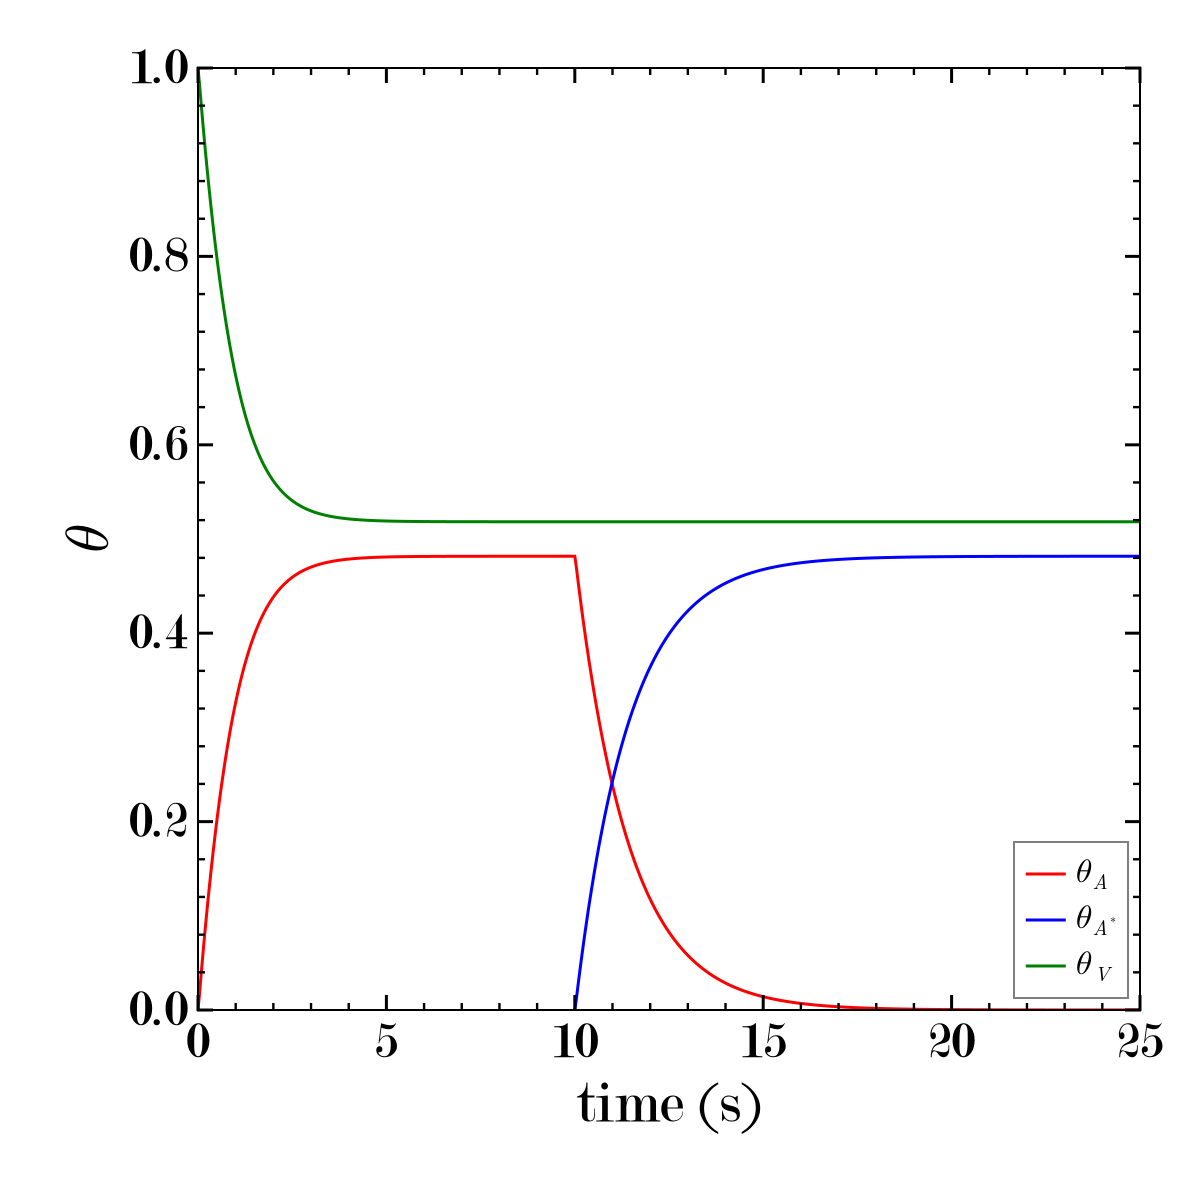

In [8]:
set_theme!(theme_linear)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

CairoMakie.ylims!(ax1, 0, 1)
CairoMakie.xlims!(ax1, 0, 25)
CairoMakie.ylims!(ax2, 0, 1)
CairoMakie.xlims!(ax2, 0, 25)

ax1.xticks  = collect(0:5:25)
ax2.xticks  = collect(0:5:25)
ax1.yticks = collect(0:0.20:1)
ax2.yticks = collect(0:0.20:1)

ax1.xlabel = "time (s)"
ax1.ylabel = L"\theta"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

pl1  = lines!(tfine, thetaA1_out, label = L"\theta_{A}", color = :red, linestyle = :solid, linewidth = 1.5)
pl1  = lines!(tfine, thetaA2_out, label = L"\theta_{A^*}", color = :blue, linestyle = :solid, linewidth = 1.5)
pl1  = lines!(tfine, 1 .- thetaA1_out .- thetaA2_out, label = L"\theta_{V}", color = :green, linestyle = :solid, linewidth = 1.5)
axislegend(position = :rb, framevisible = true)

fig1
#save("SSITKA1.svg", fig1)

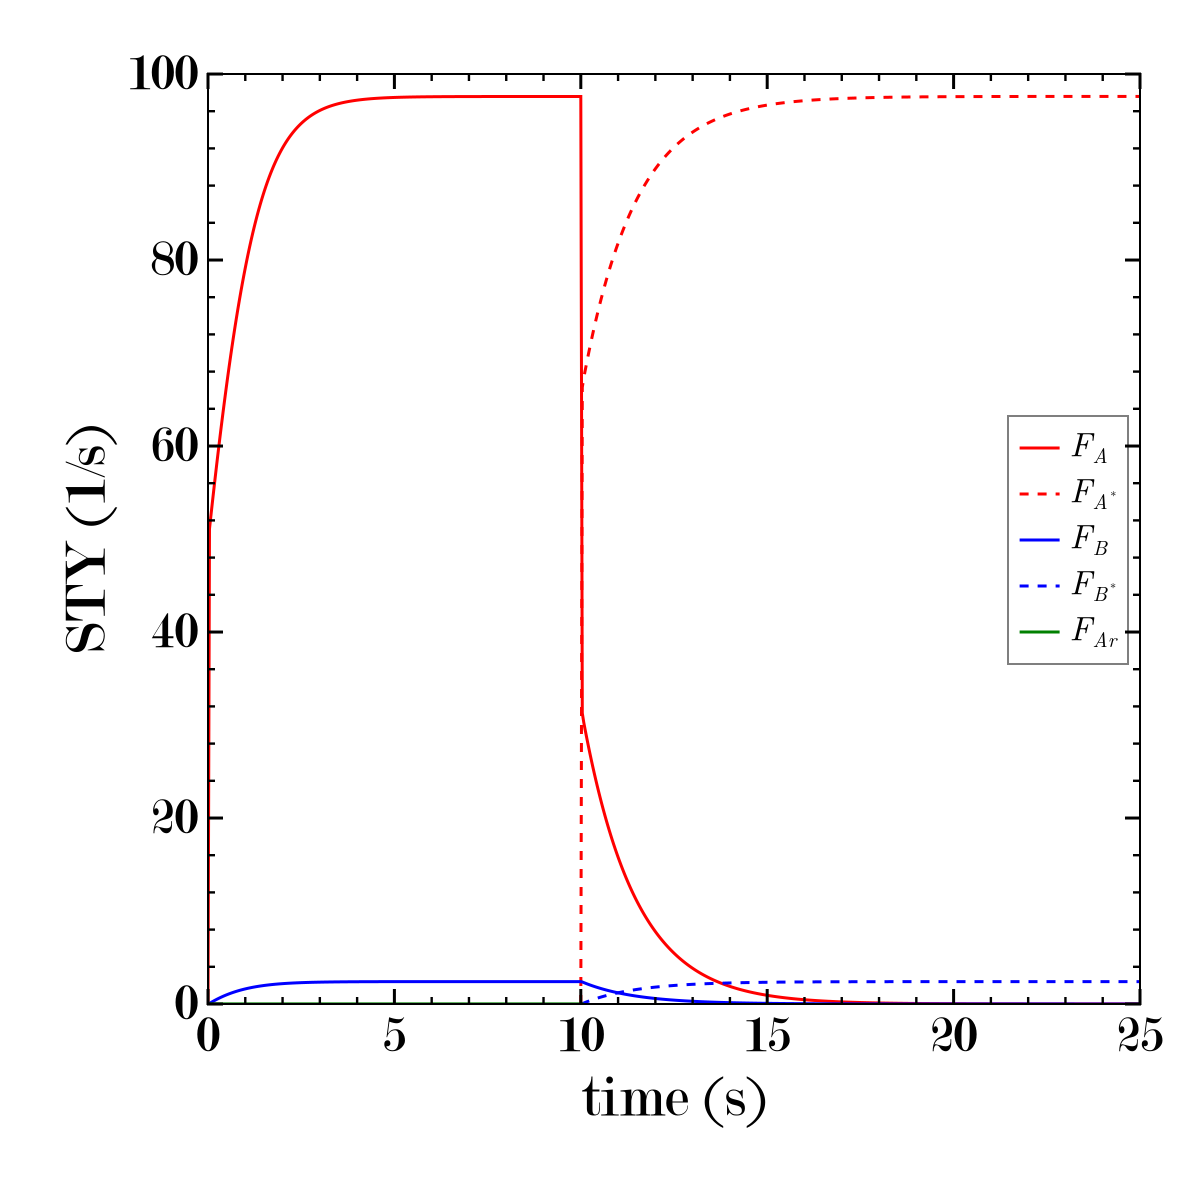

In [9]:
set_theme!(theme_linear)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

CairoMakie.ylims!(ax1, 0, 100)
CairoMakie.xlims!(ax1, 0, 25)
CairoMakie.ylims!(ax2, 0, 100)
CairoMakie.xlims!(ax2, 0, 25)


ax1.xlabel = "time (s)"
ax1.ylabel = "STY (1/s)"

ax1.xticks = collect(0:5:25)
ax1.yticks = collect(0:20:100)
ax2.xticks = collect(0:5:25)
ax2.yticks = collect(0:20:100)

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

pl1  = CairoMakie.lines!(tfine, FA1_out, label = L"F_{A}", color = :red, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tfine, FA2_out, label = L"F_{A^*}", color = :red, linestyle = :dash, linewidth = 1.5)
pl1  = CairoMakie.lines!(tfine, FB1_out, label = L"F_{B}", color = :blue, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tfine, FB2_out, label = L"F_{B^*}", color = :blue, linestyle = :dash, linewidth = 1.5)
pl1  = CairoMakie.lines!(tfine, FAr_out, label = L"F_{Ar}", color = :green, linestyle = :solid, linewidth = 1.5)
axislegend(position = :rc, framevisible = true)

fig1
#save("SSITKA2.svg", fig1)

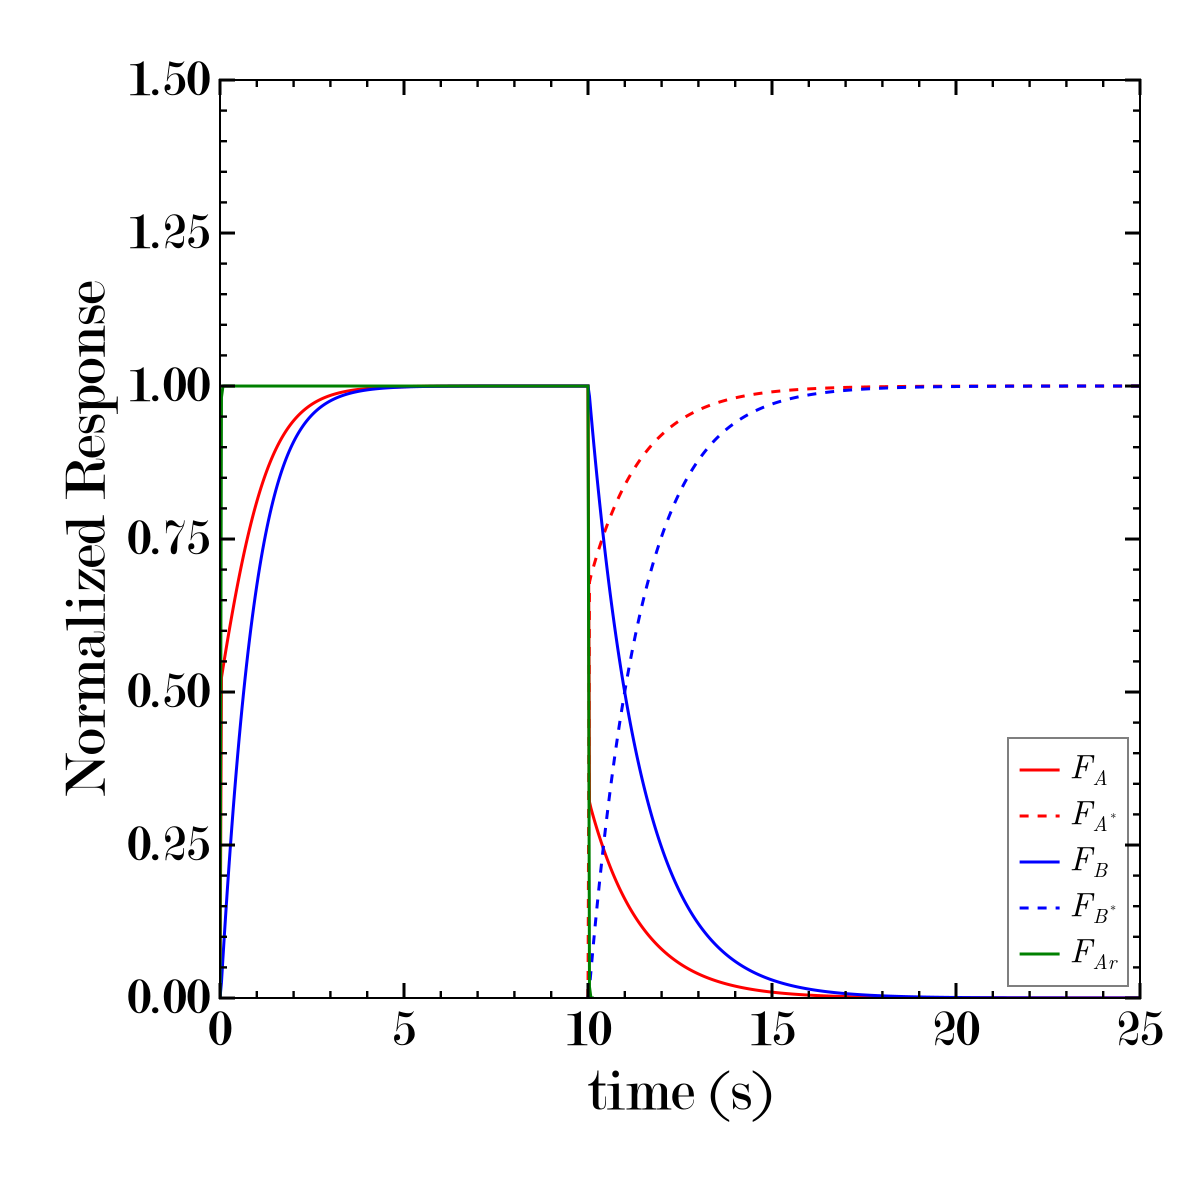

In [10]:
set_theme!(theme_linear)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

CairoMakie.ylims!(ax1, 0, 1.5)
CairoMakie.xlims!(ax1, 0, 25)
CairoMakie.ylims!(ax2, 0, 1.5)
CairoMakie.xlims!(ax2, 0, 25)

ax1.xticks  = 0:5:25
ax1.yticks = 0:0.25:1.5
ax2.xticks  = 0:5:25
ax2.yticks = 0:0.25:1.5

ax1.xlabel = "time (s)"
ax1.ylabel = "Normalized Response"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

pl1  = CairoMakie.lines!(tfine, nFA1, label = L"F_{A}", color = :red, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tfine, nFA2, label = L"F_{A^*}", color = :red, linestyle = :dash, linewidth = 1.5)
pl1  = CairoMakie.lines!(tfine, nFB1, label = L"F_{B}", color = :blue, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tfine, nFB2, label = L"F_{B^*}", color = :blue, linestyle = :dash, linewidth = 1.5)
pl1  = CairoMakie.lines!(tfine, nFAr, label = L"F_{Ar}", color = :green, linestyle = :solid, linewidth = 1.5)
axislegend(position = :rb, framevisible = true)

fig1
#save("SSITKA3.svg", fig1)

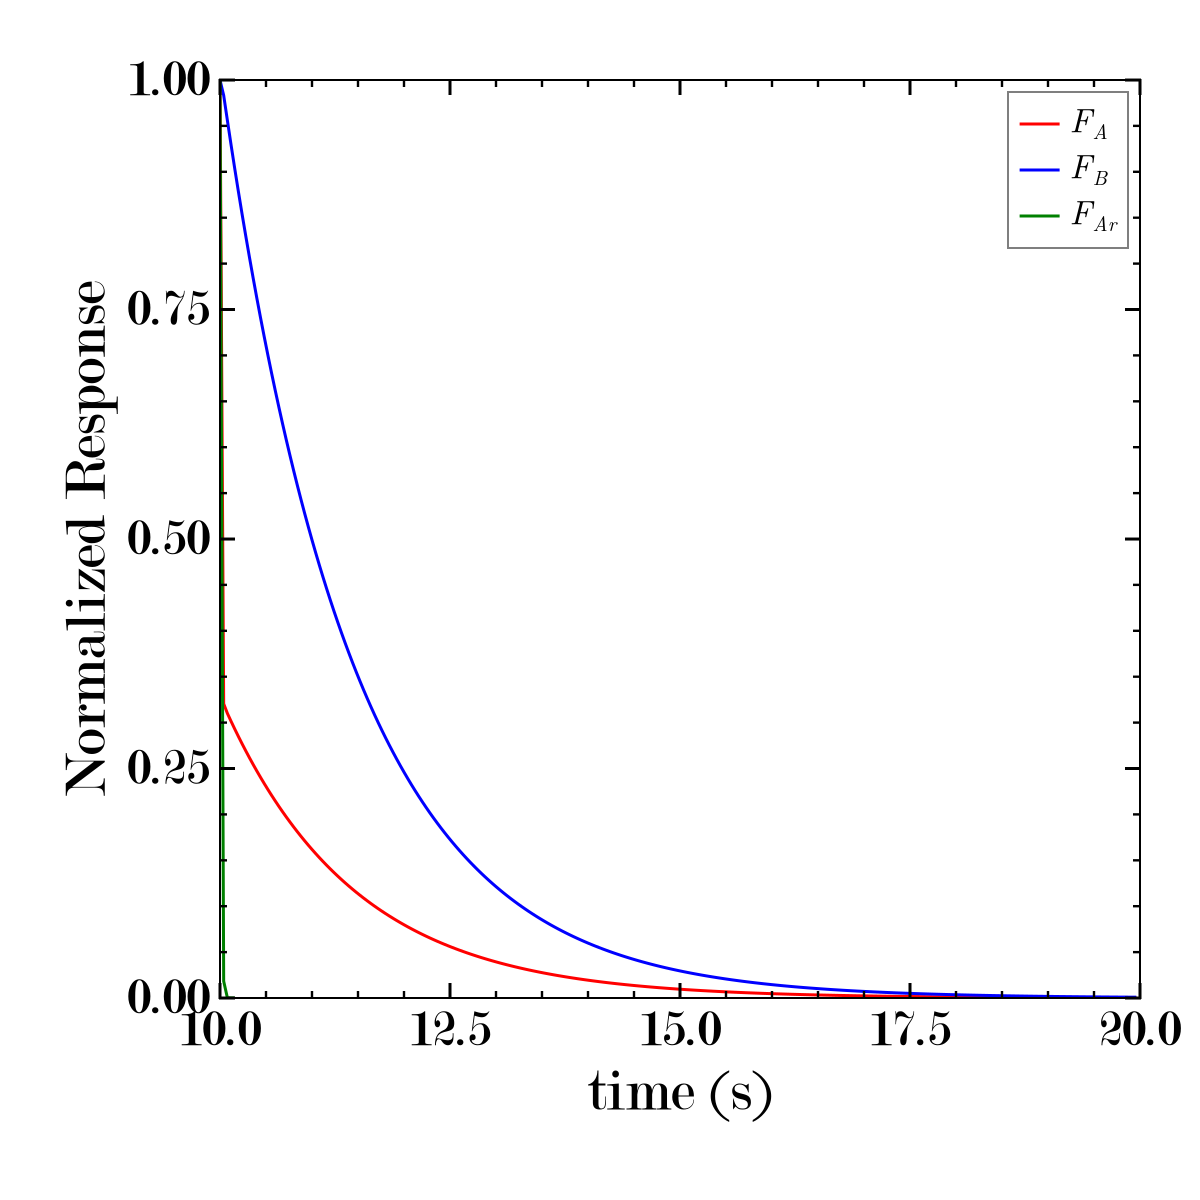

In [11]:
set_theme!(theme_linear)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

CairoMakie.ylims!(ax1, 0, 1.0)
CairoMakie.xlims!(ax1, 10, 20)
CairoMakie.ylims!(ax2, 0, 1.0)
CairoMakie.xlims!(ax2, 10, 20)

ax1.xlabel = "time (s)"
ax1.ylabel = "Normalized Response"

ax1.xticks = 10:2.5:20
ax1.yticks = 0:0.25:1.0
ax2.xticks = 10:2.5:20
ax2.yticks = 0:0.25:1.0

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

pl1  = CairoMakie.lines!(tfine, nFA1, label = L"F_{A}", color = :red, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.lines!(tfine, nFA2, label = L"F_{A^*}", color = :red, linestyle = :dash, linewidth = 1.5)
pl1  = CairoMakie.lines!(tfine, nFB1, label = L"F_{B}", color = :blue, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.lines!(tfine, nFB2, label = L"F_{B^*}", color = :blue, linestyle = :dash, linewidth = 1.5)
pl1  = CairoMakie.lines!(tfine, nFAr, label = L"F_{Ar}", color = :green, linestyle = :solid, linewidth = 1.5)
axislegend(position = :rt, framevisible = true)

fig1
#save("SSITKA4.svg", fig1)

**Overall Reaction:**

$$A \longleftrightarrow B + C$$

**Mechanism:**

\begin{align}
    A + * &\longleftrightarrow A_*\\
    B + * &\longleftrightarrow B_*\\
    C + * &\longleftrightarrow C_*\\
    A_*   &\longleftrightarrow I_{1*} + I_{2*}\\
    I_{1*}   &\longleftrightarrow B* \\
    I_{2*}   &\longleftrightarrow C* \\
\end{align}

In [12]:
k1f = 1
K1  = 1
k1r = k1f/K1

k2f = 1
K2  = 1
k2r = k2f/K2

k3f = 1
K3  = 1
k3r = k3f/K3

k4f = 1
K4  = 10
k4r = k4f/K4

k5f = 0.1
K5  = 1
k5r = k5f/K5

k6f = 0.01
K6  = 1
k6r = k6f/K6

NS  = 100    #Number of sites, may not be known

function transientmodel(u, p, t)
    FAf, FBf, FCf, FArf = p #Feed molar flowrates of switching gases
    FTot    = sum(p)
    FA, FB, FC, FAr, tA, tB, tC, tI1, tI2 = u
    
    tau     = 0.01  #This is just V/Qf for the reactor; if it is small we have no real contribution of holdup
    P       = 1.0 #bar
    P0      = 1.0 #bar
    tV      = 1.0 - tA - tB - tC - tI1 - tI2
    
    yA     = FA/FTot
    yB     = FB/FTot
    yC     = FC/FTot
    aA     = yA*P/P0
    aB     = yB*P/P0
    aC     = yC*P/P0 
    
    r1     = k1f*aA*tV - k1r*tA
    r2     = k2f*aB*tV - k2r*tB
    r3     = k3f*aC*tV - k3r*tC
    r4     = k4f*tA    - k4r*tI1*tI2
    r5     = k5f*tI1   - k5r*tB
    r6     = k6f*tI2   - k6r*tC
    
    RA     = -r1
    RB     = -r2
    RC     = -r3
    
    du1     = 1/tau*(FAf - FA + RA*NS)
    du2     = 1/tau*(FBf - FB + RB*NS)
    du3     = 1/tau*(FCf - FC + RC*NS)
    du4     = 1/tau*(FArf - FAr)
    du5     = r1 - r4
    du6     = r2 + r5
    du7     = r3 + r6
    du8     = r4 - r5
    du9     = r4 - r6
    return  [du1, du2, du3, du4, du5, du6, du7, du8, du9]
end

function condition1(u, t, integrator)
    return t == 10.0
end

function affect1!(integrator)
    integrator.p = [100.0, 0.0, 0.0, 0.0]
end

function condition2(u, t, integrator)
    return t == 20.0
end

function affect2!(integrator)
    integrator.p = [100.0, 0.0, 0.0, 0.0]
end

function condition3(u, t, integrator)
    return t == 30.0
end

function affect3!(integrator)
    integrator.p = [100.0, 0.0, 0.0, 0.0]
end

function condition4(u, t, integrator)
    return t == 40.0
end

function affect4!(integrator)
    integrator.p = [100.0, 0.0, 0.0, 0.0]
end

cb1  = DiscreteCallback(condition1, affect1!)
cb2  = DiscreteCallback(condition2, affect2!)
cb3  = DiscreteCallback(condition3, affect3!)
cb4  = DiscreteCallback(condition4, affect4!)

var0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
p0   = [100.00, 0.0, 0.0, 0.0] 
span = (0.0, 1e10) #time of integration
prob = ODEProblem(transientmodel, var0, span, p0)
sol  = solve(prob, Rodas5(), abstol = 1e-12, reltol = 1e-12)
#sol  = solve(prob, Rodas5(), callback = CallbackSet(cb1, cb2, cb3, cb4), tstops = [10.0, 20.0, 30.0, 40.0], abstol = 1e-12, reltol = 1e-12)
tfine = range(0, stop = 200, length = 2001)
#tfine = 10 .^range(-4, stop = 10, length = 2001)
FA_out     = sol(tfine)[1,:]
FB_out     = sol(tfine)[2,:]
FC_out     = sol(tfine)[3,:]
FAr_out    = sol(tfine)[4,:]
tA_out     = sol(tfine)[5,:]
tB_out     = sol(tfine)[6,:]
tC_out     = sol(tfine)[7,:]
tI1_out    = sol(tfine)[8,:]
tI2_out    = sol(tfine)[9,:]
tV_out     = 1 .- tA_out .- tB_out .- tC_out .- tI1_out .- tI2_out;

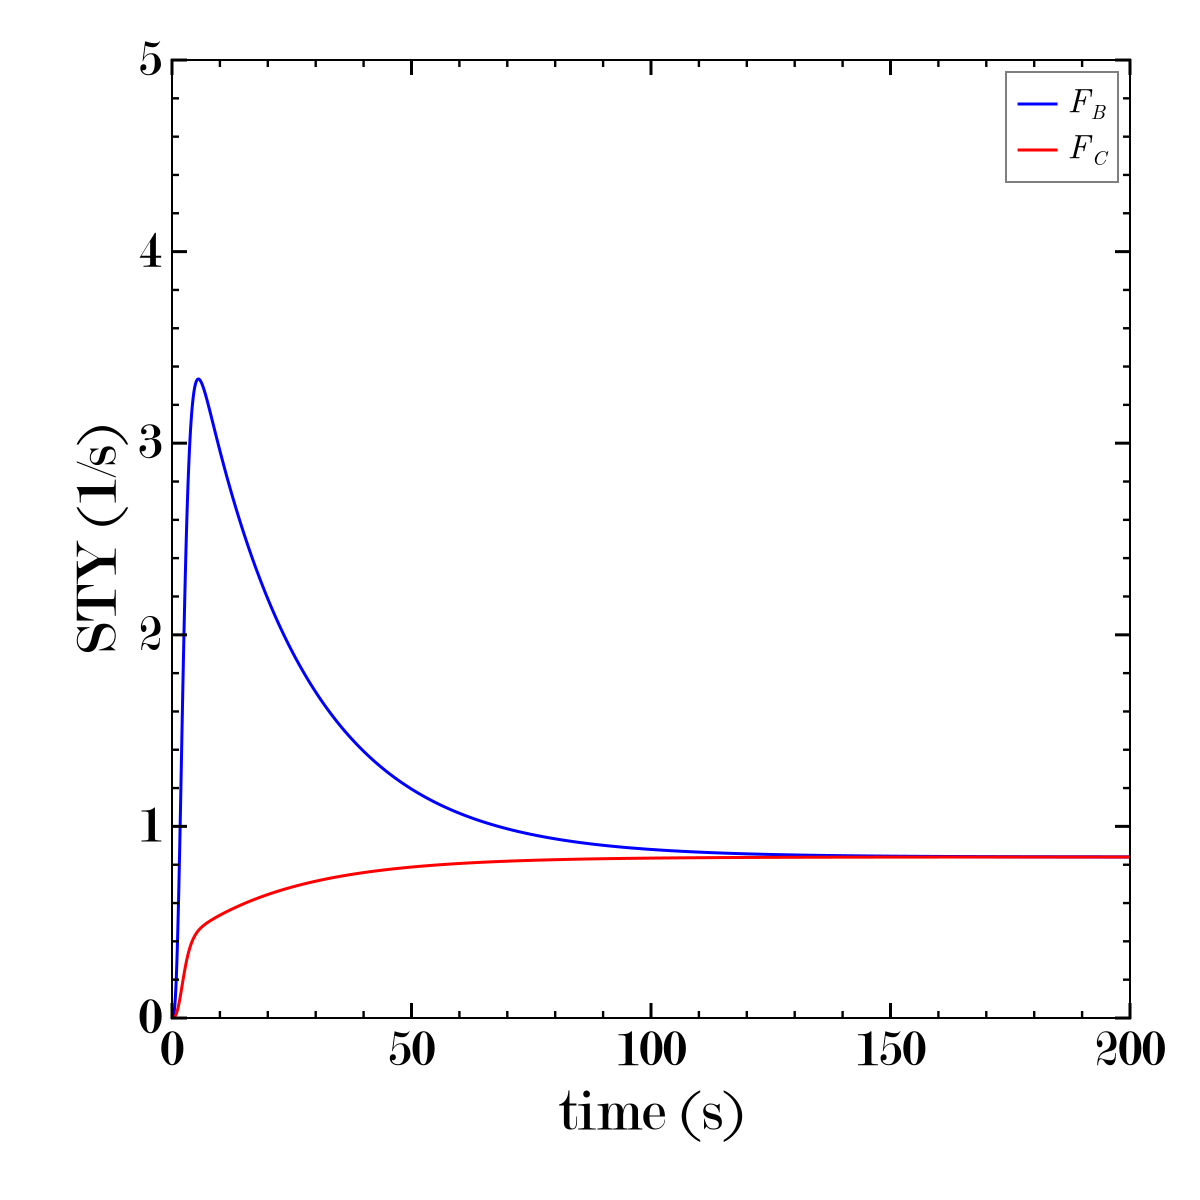

In [13]:
set_theme!(theme_linear)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

CairoMakie.ylims!(ax1, 0, 5)
CairoMakie.xlims!(ax1, 0, 200)
CairoMakie.ylims!(ax2, 0, 5)
CairoMakie.xlims!(ax2, 0, 200)

ax1.xlabel = "time (s)"
ax1.ylabel = "STY (1/s)"

ax1.xticks = 0:50:200
ax1.yticks = 0:1:5
ax2.xticks = 0:50:200
ax2.yticks = 0:1:5

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#pl1  = CairoMakie.lines!(tfine, FA_out, label = L"F_{B}", color = :black, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tfine, FB_out, label = L"F_{B}", color = :blue, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tfine, FC_out, label = L"F_{C}", color = :red, linestyle = :solid, linewidth = 1.5)
axislegend(position = :rt, framevisible = true)

fig1
#save("SSITKA5.svg", fig1)

In [14]:
k1f = 1
K1  = 1
k1r = k1f/K1

k2f = 1
K2  = 1
k2r = k2f/K2

k3f = 1
K3  = 1
k3r = k3f/K3

k4f = 1
K4  = 10
k4r = k4f/K4

k5f = 0.1
K5  = 1
k5r = k5f/K5

k6f = 0.01
K6  = 1
k6r = k6f/K6

NS  = 100    #Number of sites, may not be known

function transientmodel(u, p, t)
    FAf, FBf, FCf, FArf = p #Feed molar flowrates of switching gases
    FTot    = sum(p)
    FA, FB, FC, FAr, tA, tB, tC, tI1, tI2 = u
    
    tau     = 0.01  #This is just V/Qf for the reactor; if it is small we have no real contribution of holdup
    P       = 1.0 #bar
    P0      = 1.0 #bar
    tV      = 1.0 - tA - tB - tC - tI1 - tI2
    
    yA     = FA/FTot
    yB     = FB/FTot
    yC     = FC/FTot
    aA     = yA*P/P0
    aB     = yB*P/P0
    aC     = yC*P/P0 
    
    r1     = k1f*aA*tV - k1r*tA
    r2     = k2f*aB*tV - k2r*tB
    r3     = k3f*aC*tV - k3r*tC
    r4     = k4f*tA    - k4r*tI1*tI2
    r5     = k5f*tI1   - k5r*tB
    r6     = k6f*tI2   - k6r*tC
    
    RA     = -r1
    RB     = -r2
    RC     = -r3
    
    du1     = 1/tau*(FAf - FA + RA*NS)
    du2     = 1/tau*(FBf - FB + RB*NS)
    du3     = 1/tau*(FCf - FC + RC*NS)
    du4     = 1/tau*(FArf - FAr)
    du5     = r1 - r4
    du6     = r2 + r5
    du7     = r3 + r6
    du8     = r4 - r5
    du9     = r4 - r6
    return  [du1, du2, du3, du4, du5, du6, du7, du8, du9]
end

function condition1(u, t, integrator)
    return t == 1200.0
end

function affect1!(integrator)
    integrator.p = [100.0, 0.0, 0.0, 100.0]
end

function condition2(u, t, integrator)
    return t == 1400.0
end

function affect2!(integrator)
    integrator.p = [100.0, 0.0, 0.0, 1000.0]
end

function condition3(u, t, integrator)
    return t == 1700.0
end

function affect3!(integrator)
    integrator.p = [100.0, 0.0, 0.0, 10000.0]
end

function condition4(u, t, integrator)
    return t == 2200.0
end

function affect4!(integrator)
    integrator.p = [100.0, 0.0, 0.0, 2000.0]
end

cb1  = DiscreteCallback(condition1, affect1!)
cb2  = DiscreteCallback(condition2, affect2!)
cb3  = DiscreteCallback(condition3, affect3!)
cb4  = DiscreteCallback(condition4, affect4!)

var0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
p0   = [100.00, 0.0, 0.0, 0.0] 
span = (0.0, 1e10) #time of integration
prob = ODEProblem(transientmodel, var0, span, p0)
#sol  = solve(prob, Rodas5(), abstol = 1e-12, reltol = 1e-12)
@time sol  = solve(prob, Rodas5(), callback = CallbackSet(cb1, cb2, cb3, cb4), tstops = [1200.0, 1400.0, 1700.0, 2200.0], abstol = 1e-12, reltol = 1e-12)
tfine = range(1000, stop = 3000, length = 2001)
#tfine = 10 .^range(-4, stop = 10, length = 2001)
FA_out     = sol(tfine)[1,:]
FB_out     = sol(tfine)[2,:]
FC_out     = sol(tfine)[3,:]
FAr_out    = sol(tfine)[4,:]
tA_out     = sol(tfine)[5,:]
tB_out     = sol(tfine)[6,:]
tC_out     = sol(tfine)[7,:]
tI1_out    = sol(tfine)[8,:]
tI2_out    = sol(tfine)[9,:]
tV_out     = 1 .- tA_out .- tB_out .- tC_out .- tI1_out .- tI2_out;

  2.069787 seconds (18.82 M allocations: 736.250 MiB, 23.79% gc time, 70.60% compilation time: 7% of which was recompilation)


In [15]:


# function condition1(u, t, integrator)
#     return t == 1200.0
# end
# function affect1!(integrator)
#     integrator.p = [100.0, 0.0, 0.0, 100.0]
# end

# ...

# function condition4(u, t, integrator)
#     return t == 2200.0
# end
# function affect4!(integrator)
#     integrator.p = [100.0, 0.0, 0.0, 2000.0]
# end

# cb1  = DiscreteCallback(condition1, affect1!)
# cb2  = DiscreteCallback(condition2, affect2!)
# cb3  = DiscreteCallback(condition3, affect3!)
# cb4  = DiscreteCallback(condition4, affect4!)
# cb   = CallbackSet(cb1, cb2, cb3, cb4)

In [16]:
@time sol  = solve(prob, Rodas5(), callback = CallbackSet(cb1, cb2, cb3, cb4), tstops = [1200.0, 1400.0, 1700.0, 2200.0], abstol = 1e-12, reltol = 1e-12);

  0.516771 seconds (16.81 M allocations: 629.336 MiB, 14.72% gc time)


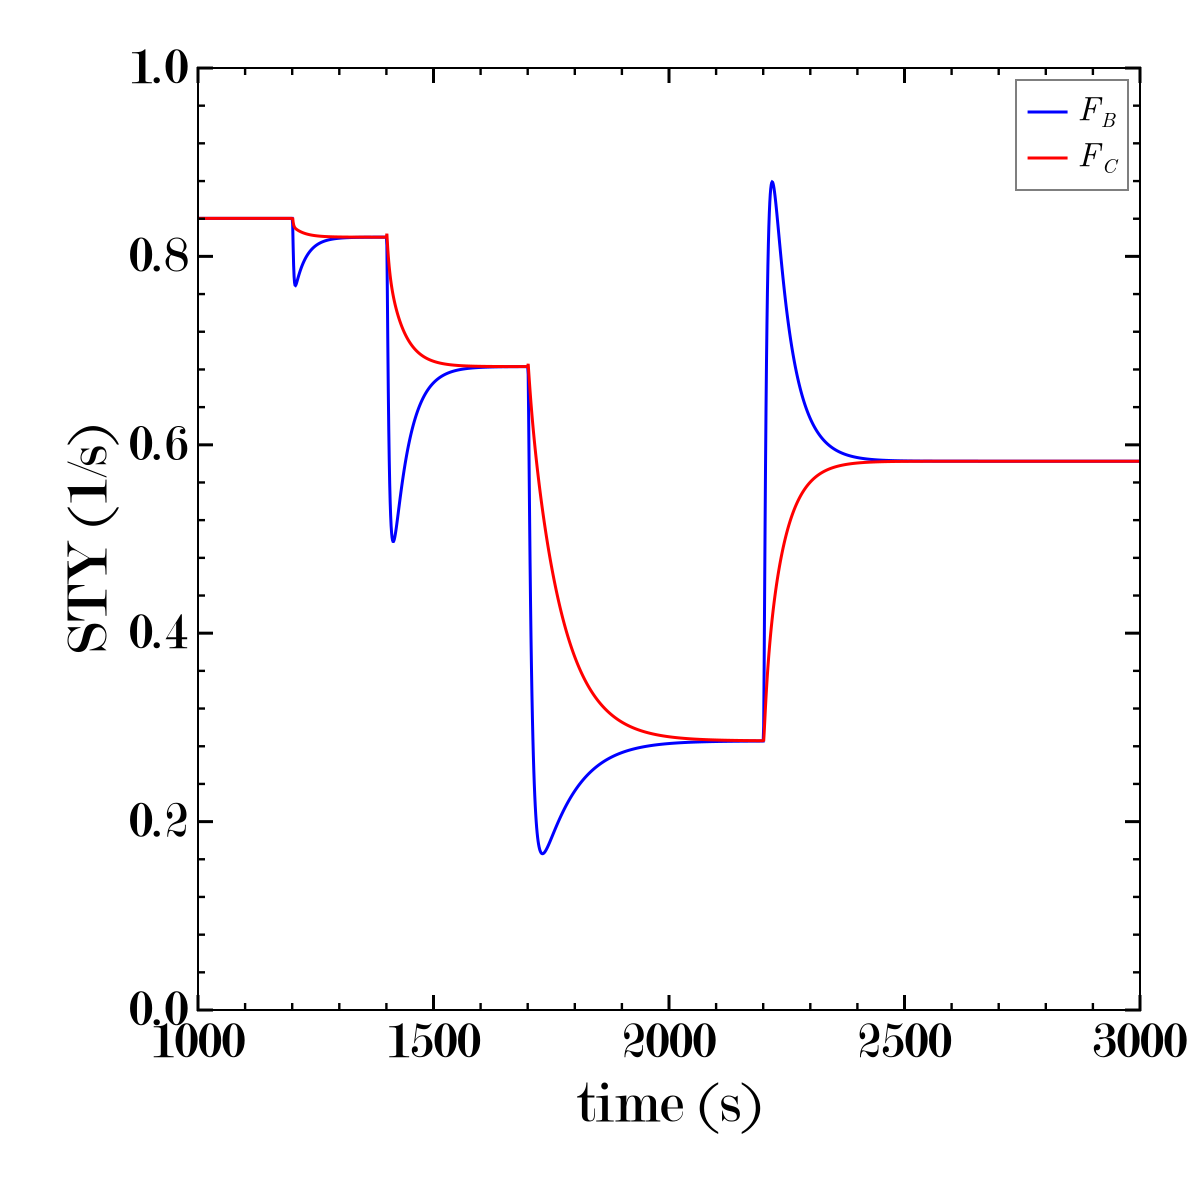

In [17]:
set_theme!(theme_linear)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

CairoMakie.ylims!(ax1, 0, 1)
CairoMakie.xlims!(ax1, 1000, 3000)
CairoMakie.ylims!(ax2, 0, 1)
CairoMakie.xlims!(ax2, 1000, 3000)

ax1.xlabel = "time (s)"
ax1.ylabel = "STY (1/s)"
ax1.yticks = 0:0.2:1
ax2.yticks = 0:0.2:1

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#pl1  = CairoMakie.lines!(tfine, FA_out, label = L"F_{B}", color = :black, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tfine, FB_out, label = L"F_{B}", color = :blue, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tfine, FC_out, label = L"F_{C}", color = :red, linestyle = :solid, linewidth = 1.5)
axislegend(position = :rt, framevisible = true)

fig1
#save("SSITKA6.svg", fig1)